## Made by VanPhu Điện tử 11 - K63 RHUST
https://www.facebook.com/phu.smallcityboiz

Source Code này chủ yếu để giải (hầu hết) bài tập trong đề cương phương pháp tính.
Code chỉ hỗ trợ việc tính toán, muốn hiểu hàm xuất ra những gì thì cần học và hiểu cách tính.
Trong chương trình học còn thuật toán Gauss-Seidel và tính đạo hàm gần đúng mình chưa viết được do phần đó tự đọc :(.
Mình còn gà nên code hơi cồng kềnh, mong các bạn thông cảm. Nếu có thắc mắc về cách sử dụng các hàm có thể ib cho mình vào link fb ở trên (mình không giảng lại lý thuyết).

#### Note:
(Nếu chưa biết về 1 số hàm trong thư viện numpy)

    x**a = x^a (a phải là số nguyên)
    np.sqrt(a) = căn2(a)
    np.cbrt(a) = căn3(a)
    np.ones((1, 3)) = [[1, 1, 1]] (ma trận 1x3)
    np.zeros((2, 3)) = [[0, 0, 0], (ma trận 2x3)
                        [0, 0, 0]]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from full_code import chiadoi, tieptuyen, daycung, lapdon, Gauss, Gauss_Jordan, lapJacobi, lapdon_matrix, giai_Gauss,\
giai_GaussJordan, chuan1, chuan2, chuanvocung, hoocner, hoocnenguoc, NoisuyLG, NoisuyNewtonLui, NoisuyNewtonTien, \
NoisuyNTcachdeuLui, NoisuyNTcachdeuTien, nhapX, nhapY, Binhphuongtoithieu, Tichphangandung_HT, Simpson, Euler_hien, Euler_an,\
Euler_caitien, RK_4

# Sai số

In [2]:
def saisotuongdoi(gandung, saiso):
    return saiso/gandung*100

saisotuongdoi(2.15, 0.01)

0.46511627906976744

In [174]:
def chusodangtin(a, saisotuongdoi=0, saisotuyetdoi=0):
    if saisotuongdoi != 0:
        saisotuyetdoi = a*saisotuongdoi
    i = -20
    while(saisotuyetdoi > 0.5*(10**i)):
        i += 1
    if i >= 0:
        return int(a/(10**i))
    else:
        return int(a*(10**(-i)))

chusodangtin(48361, saisotuongdoi=0.01)

48

In [4]:
def ham(a):# tự viết
    return 6.5*np.sqrt(a+1)
def daoham(a):# tự viết
    return 6.5/np.sqrt(a+1)
def saisotuyetdoicuaham(a, delta_a):
    return daoham(a)*delta_a
def saisotuongdoicuaham(a, delta_a):
    return saisotuyetdoicuaham(a, delta_a)/ham(a)

chusodangtin(ham(0.809216), saisotuongdoicuaham(0.809216, 2.7*(10**-5)))

8742

In [5]:
def ham(a, b):# tự viết
    pass
def daohama(a, b):# tự viết
    pass
def daohamb(a, b):# tự viết
    pass
def saisotuyetdoicuaham(a, delta_a, b, delta_b):
    return daohama(a, b)*delta_a + daohamb(a, b)* delta_b
def saisotuongdoicuaham(a, delta_a, b, delta_b):
    return saisotuyetdoicuaham(a, delta_a, b, delta_b)/ham(a, b)

# saisotuongdoicuaham(0.97, 0.005, 1.132, 0.0005)

In [6]:
def ham(a, b, c):# tự viết
    return 2*a + b - 0.5*c
def daohama(a, b, c):# tự viết
    return 2
def daohamb(a, b, c):# tự viết
    return 1
def daohamc(a, b, c):# tự viết
    return 0.5
def saisotuyetdoicuaham(a, delta_a, b, delta_b, c, delta_c):
    return np.abs(daohama(a, b, c))*delta_a + np.abs(daohamb(a, b, c))* delta_b + np.abs(daohamc(a, b, c))* delta_c
def saisotuongdoicuaham(a, delta_a, b, delta_b, c, delta_c):
    return saisotuyetdoicuaham(a, delta_a, b, delta_b, c, delta_c)/ham(a, b, c)

saisotuyetdoicuaham(0, 0.012, 0, 0.023, 0, 0.123)

0.1085

# Chia đôi

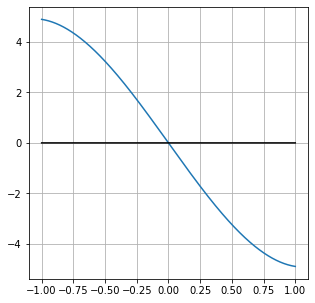

In [2]:
x = np.linspace(-1,1, 100000)
plt.figure(figsize=(5,5))
y =  x**3 - 7*np.sin(x)
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')
# plt.plot(x,x)
plt.grid()

In [11]:
def f(x): # tự viết
    return x**4 - x**3*4 + 8*x - 2

a = 3.3
b = 3.4
n = 0
epxilon = 0.005
# Nếu bài toán cho trước n thì để epxilon = 0 và ngược lại

chiadoi(f, a, b, n=n, epxilon=epxilon)

n = 5 

a: 3.3, b: 3.4
x: 3.3499999999999996
f(x) = 0.36300624999998377
delta x: 0.04999999999999982

a: 3.3, b: 3.3499999999999996
x: 3.3249999999999997
f(x) = -0.2129683593749938
delta x: 0.02499999999999991

a: 3.3249999999999997, b: 3.3499999999999996
x: 3.3374999999999995
f(x) = 0.07083400878905621
delta x: 0.012499999999999734

a: 3.3249999999999997, b: 3.3374999999999995
x: 3.33125
f(x) = -0.07210656585693442
delta x: 0.006249999999999645

a: 3.33125, b: 3.3374999999999995
x: 3.3343749999999996
f(x) = -0.0008969801902765084
delta x: 0.0031249999999998224



# Dây cung

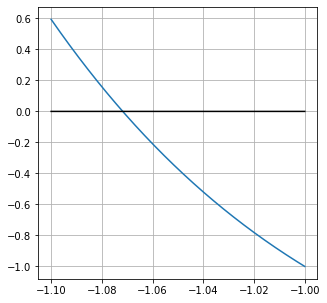

In [13]:
x = np.linspace(-1.1,-1, 100000)
plt.figure(figsize=(5,5))
y = x**10-2
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')
# plt.plot(x,x)
plt.grid()

In [4]:
def f(x): # tự viết
    return x**3-x**2*5+x+6
def daoham1(x): # tự viết
    return x**2*3-10*x+1

a = -1
b = 0
n = 3
epxilon = 0
mode = 'delta_x'

# Với bài toán cho sẵn epxilon cần truyền vào tham số mode:
# mode = 'delta_x': tính sai số theo công thức sai số mục tiêu
# mode = 'err': tính sai số theo xấp xỉ liên tiếp

daycung(f, daoham1, a, b, n=n, epxilon=epxilon, mode=mode)

f(a) = -1,  f(b) = 6
m1 = 1
M1 = 14
x0: 0
d: -1

x: -0.8571428571428571
xấp xỉ liên tiếp: 11.142857142857142
delta_x: 0.8396501457725956

x: -0.9223454833597464
xấp xỉ liên tiếp: 0.8476341408195612
delta_x: 0.0393897154529288

x: -0.9252883538428947
xấp xỉ liên tiếp: 0.03825731628092699
delta_x: 0.0017254333406508948

epxilon0: 0.0


# Tiếp tuyến

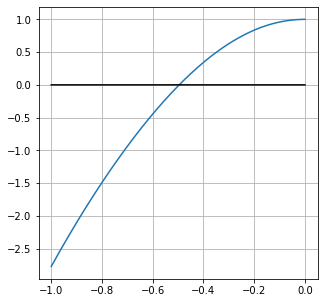

In [11]:
x = np.linspace(-1,0, 100000)
plt.figure(figsize=(5,5))
y = x**3 - 4*np.log(x**2+1)+1
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')
plt.grid()

In [2]:
def f(x): # tự viết
    return x**6-43
def daoham1(x): # tự viết
    return x**5*6
def daoham2(x): # tự viết
    return x**4*30

a = 1
b = 2
n = 0
epxilon = 1/100
mode = 'err'

# Tương tự dây cung

tieptuyen(f, daoham1, daoham2, a, b, n=n, epxilon=epxilon, mode=mode)

f(a) = -42,  f(b) = 21
m1 = 6
M2 = 480
x0: 2

x: 1.890625
xấp xỉ liên tiếp: 0.478515625
delta x: 0.44502394805749645

x: 1.8722021676231682
xấp xỉ liên tiếp: 0.013576030111393746
delta x: 0.01070129909423064

x: 1.8717369321901567
xấp xỉ liên tiếp: 8.657760325174736e-06
delta x: 6.645882522822906e-06

n = 3
epxilon0: 0.015811388300841896


# Lặp đơn

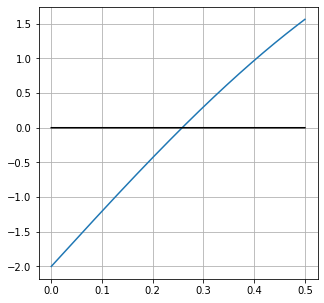

In [14]:
x = np.linspace(0,0.5, 100000)
plt.figure(figsize=(5,5))
y =  x**4 - x**3*4+8*x-2
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')
# plt.plot(x,x)
plt.grid()

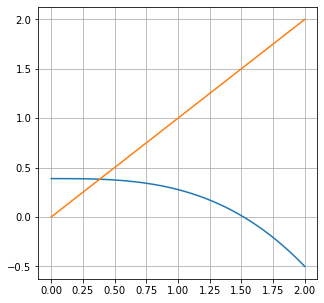

In [15]:
x = np.linspace(0,2, 100000)
plt.figure(figsize=(5,5))
y = (7-x**3*2)/18
plt.plot(x,y)
plt.plot(x,x)
plt.grid()

In [5]:
def f(x): # tự viết
    return x**3-3*x-4
def phi(x): # tự viết
    return 1.4**x
def daohamphi(x): # tự viết
    return np.log(1.4)*1.4**x

#q = max(phi')

x0 = 1.8
n = 0
epxilon = 0.00005
a = -2.2
b = -2

x = np.linspace(a, b, 1000000)
q = np.max(daohamphi(x)) 
lapdon(f, phi, x0, q, n=n, epxilon=epxilon)

q = 0.17166950848021068

x: 1.8324429572510013
xấp xỉ liên tiếp: 0.006723725109654263

x: 1.8525557650146345
xấp xỉ liên tiếp: 0.004168331189408343

x: 1.865135270789608
xấp xỉ liên tiếp: 0.002607072413031041

x: 1.873046474766938
xấp xỉ liên tiếp: 0.0016395780575252053

x: 1.87803897993635
xấp xỉ liên tiếp: 0.0010346847270409666

x: 1.8811964350395485
xấp xỉ liên tiếp: 0.0006543750002730353

x: 1.8831960725862276
xấp xỉ liên tiếp: 0.000414420087502927

x: 1.8844635556569869
xấp xỉ liên tiếp: 0.00026268282767789305

x: 1.8852673996227378
xấp xỉ liên tiếp: 0.000166594734720027

x: 1.8857773790796322
xấp xỉ liên tiếp: 0.00010569201978720854

x: 1.8861009947928218
xấp xỉ liên tiếp: 6.706858070358415e-05

x: 1.8863063791791503
xấp xỉ liên tiếp: 4.256542166622688e-05

n = 12
epxilon0: 0.00024125731437486925


# Gauss

In [2]:
a = np.array([[1,1,-3,3,6],
              [1,-2,-1,0,2],
              [0,1,1,2,12],
              [2,-3,2,0,6]])
b = Gauss(a.astype(np.float))

giai_Gauss(b)

[[ 1.  1. -3.  3.  6.]
 [ 1. -2. -1.  0.  2.]
 [ 0.  1.  1.  2. 12.]
 [ 2. -3.  2.  0.  6.]] 

[[ 1.  1. -3.  3.  6.]
 [ 0. -3.  2. -3. -4.]
 [ 0.  1.  1.  2. 12.]
 [ 0. -5.  8. -6. -6.]] 

[[ 1.          1.         -3.          3.          6.        ]
 [ 0.         -3.          2.         -3.         -4.        ]
 [ 0.          0.          1.66666667  1.         10.66666667]
 [ 0.          0.          4.66666667 -1.          0.66666667]] 

[[  1.           1.          -3.           3.           6.        ]
 [  0.          -3.           2.          -3.          -4.        ]
 [  0.           0.           1.66666667   1.          10.66666667]
 [  0.           0.           0.          -3.8        -29.2       ]] 

[[  1.           1.          -3.           3.           6.        ]
 [  0.          -3.           2.          -3.          -4.        ]
 [  0.           0.           1.66666667   1.          10.66666667]
 [  0.           0.           0.          -3.8        -29.2       ]] 



array([[-6.52631579],
       [-5.15789474],
       [ 1.78947368],
       [ 7.68421053]])

# Gauss - Jordan

In [4]:
a = np.array([[1,1,-3,3,6],
              [1,-2,-1,0,2],
              [0,1,1,2,12],
              [2,-3,2,0,6]])
matrix = Gauss_Jordan(a.astype(np.float))
giai_GaussJordan(matrix)

[[ 1.  1. -3.  3.  6.]
 [ 1. -2. -1.  0.  2.]
 [ 0.  1.  1.  2. 12.]
 [ 2. -3.  2.  0.  6.]] 

đã khử hàng:  []
chọn phần tử khử: 
hàng: 1
cột: 1
[[ 1.  1. -3.  3.  6.]
 [ 0. -3.  2. -3. -4.]
 [ 0.  1.  1.  2. 12.]
 [ 0. -5.  8. -6. -6.]] 

khử tiếp không (y/n)?1
đã khử hàng:  [1]
chọn phần tử khử: 
hàng: 3
cột: 2
[[ 1.  0. -4.  1. -6.]
 [ 0.  0.  5.  3. 32.]
 [ 0.  1.  1.  2. 12.]
 [ 0.  0. 13.  4. 54.]] 

khử tiếp không (y/n)?1
đã khử hàng:  [1, 3]
chọn phần tử khử: 
hàng: 4
cột: 3
[[ 1.          0.          0.          2.23076923 10.61538462]
 [ 0.          0.          0.          1.46153846 11.23076923]
 [ 0.          1.          0.          1.69230769  7.84615385]
 [ 0.          0.         13.          4.         54.        ]] 

[[ 1.          0.          0.          2.23076923 10.61538462]
 [ 0.          0.          0.          1.46153846 11.23076923]
 [ 0.          1.          0.          1.69230769  7.84615385]
 [ 0.          0.          1.          0.30769231  4.15384615]]


array([[-6.52631579],
       [-5.15789474],
       [ 1.78947368],
       [ 7.68421053]])

# Chuẩn của ma trận

In [6]:
a = np.array([[10,2,3],
              [3,1,1],
              [22,1,0]])
print(f'chuẩn hàng: {chuanvocung(a)}')
print(f'chuẩn cột: {chuan1(a)}')
print(f'chuẩn Euclide: {chuan2(a)}')

chuẩn hàng: 23
chuẩn cột: 35
chuẩn Euclide: 24.460787211269043


# Lặp đơn

In [6]:
#B, d là ma trận trong công thức lặp

B = np.array([[-0.3,0.2,0.15],
              [-0.17,0.21,0.12],
              [0.22,-0.11,0.08]])

d = np.array([2.5,-3.7,4.2])

X0 = np.array([1,1,1])
n = 0
epxilon = 0.005

# Nếu B, d là ma trận hệ số của hệ phương trình thì bỏ comment (bôi đen và ctrl + /) đoạn code dưới đây:

# for i in range(len(B)):
#     d[i] = d[i] / B[i,i]
#     B[i] = B[i] / B[i,i]
#     B[i] *= -1
#     B[i, i] = 0 

print(f'B = \n{B}\n')
print(f'd = \n{d}\n')

q = chuanvocung(B)

lapdon_matrix(B.astype(np.float), d.astype(np.float), X0, q, n=n, epxilon=epxilon)

B = 
[[-0.3   0.2   0.15]
 [-0.17  0.21  0.12]
 [ 0.22 -0.11  0.08]]

d = 
[ 2.5 -3.7  4.2]

q = 0.65

X =
 [[ 2.55]
 [-3.54]
 [ 4.39]]
xấp xỉ liên tiếp: 8.431428571428572

X =
 [[ 1.6855]
 [-4.3501]
 [ 5.5016]]
xấp xỉ liên tiếp: 2.0643999999999987

X =
 [[ 1.94957 ]
 [-4.239864]
 [ 5.489449]]
xấp xỉ liên tiếp: 0.49041571428571357

X =
 [[ 1.89057355]
 [-4.26306446]
 [ 5.53444636]]
xấp xỉ liên tiếp: 0.10956483571428527

X =
 [[ 1.910382  ]
 [-4.25250748]
 [ 5.52761898]]
xấp xỉ liên tiếp: 0.03678711585714277

X =
 [[ 1.90552675]
 [-4.25447723]
 [ 5.53026938]]
xấp xỉ liên tiếp: 0.009016882494285847

X =
 [[ 1.90698693]
 [-4.25374744]
 [ 5.52962993]]
xấp xỉ liên tiếp: 0.0027117670959786455

n = 7


# Lặp Jacobi

In [4]:
# B là ma trận hệ số của hệ phương trình

B = np.array([[25.32, 9.24, -19.56, 2.27],
              [4.15, 18.34, -15.52, 3.48],
              [5.17, -2.35, -65.78, 15.75],
              [-8.23, 3.14, 2.59, 42.67]])
d = np.array([125.32, 243.57, 219.68, -98.366])
X0 = np.array([1.5, 0.5, 1, 2])
n = 3
epxilon = 0

lapJacobi(B.astype(np.float), d.astype(np.float), X0, n=n, epxilon=epxilon)

chéo trội cột
B = 
[[ 0.         -0.36492891  0.77251185 -0.08965245]
 [-0.22628135  0.          0.84623773 -0.18974918]
 [ 0.07859532 -0.03572514  0.          0.23943448]
 [ 0.19287556 -0.073588   -0.06069838  0.        ]]
d = 
[[ 4.94944708]
 [13.28080698]
 [-3.3396169 ]
 [-2.30527303]]

lamda: 3.5866957470010905
q = 0.8031624863685933

X =
 [[ 5.36018957]
 [13.40812432]
 [-2.76071754]
 [-2.11345207]]
xấp xỉ liên tiếp: 360.64055054245057

X =
 [[-1.88677597]
 [10.13269849]
 [-3.90337158]
 [-2.09052945]]
xấp xỉ liên tiếp: 171.05237078878866

X =
 [[-1.57624724]
 [10.80124514]
 [-4.35044561]
 [-3.17790267]]
xấp xỉ liên tiếp: 36.78517996114052



# Hoocner

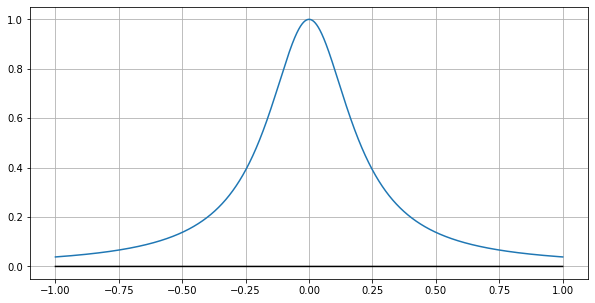

In [2]:
x = np.linspace(-1,1, 100000)
plt.figure(figsize=(10,5))
y =  1/(25*(x**2) +1)
z = 0*x
plt.plot(x,y)
plt.plot(x,z, color='black')

# plt.plot(x,x)
plt.grid()

### Sơ đồ chia

In [4]:
# chia đa thức (x^6 - 8x^5 + 7x^3 +18x^2 - 9x - 20) cho (x - 2)

a = np.array([[7,-8,0,7,18,-9,-20]])
b = np.array([[2]])

pd.DataFrame(hoocner(a,b)[:,1:], index=hoocner(a,b)[:,0], columns=[i for i in range(len(a[0])-1,-1,-1)])

,6,5,4,3,2,1,0
0.0,7.0,-8.0,0.0,7.0,18.0,-9.0,-20.0
2.0,7.0,6.0,12.0,31.0,80.0,151.0,282.0


### Sơ đồ nhân

In [178]:
# nhân (x - 1)(x - 3)(x - 5)(x - 7)

a = np.array([[1,3,5,7]])

pd.DataFrame(hoocnenguoc(a), index=a[0], columns=[i for i in range(len(a[0]),-1,-1)])

,4,3,2,1,0
1,0.0,0.0,0.0,1.0,-1.0
3,0.0,0.0,1.0,-4.0,3.0
5,0.0,1.0,-9.0,23.0,-15.0
7,1.0,-16.0,86.0,-176.0,105.0


# Nội suy Lagrange

In [8]:
# somoc = int(input("Số mốc nội suy: "))
# X = nhapX()
# Y = nhapY()

X = np.array([[20,30,40,50,60,70,80,90]])
Y = np.array([[106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46]])
b = np.array([[100]])

NoisuyLG(X, Y, b)


Sơ đồ nhân:
       8      7        6          5            4             3             2  \
20  0.0    0.0      0.0        0.0          0.0  0.000000e+00  0.000000e+00   
30  0.0    0.0      0.0        0.0          0.0  0.000000e+00  1.000000e+00   
40  0.0    0.0      0.0        0.0          0.0  1.000000e+00 -9.000000e+01   
50  0.0    0.0      0.0        0.0          1.0 -1.400000e+02  7.100000e+03   
60  0.0    0.0      0.0        1.0       -200.0  1.550000e+04 -5.800000e+05   
70  0.0    0.0      1.0     -270.0      29500.0 -1.665000e+06  5.104000e+07   
80  0.0    1.0   -350.0    51100.0   -4025000.0  1.842400e+08 -4.886000e+09   
90  1.0 -440.0  82600.0 -8624000.0  546490000.0 -2.146760e+10  5.090040e+11   

               1             0  
20  1.000000e+00 -2.000000e+01  
30 -5.000000e+01  6.000000e+02  
40  2.600000e+03 -2.400000e+04  
50 -1.540000e+05  1.200000e+06  
60  1.044000e+07 -7.200000e+07  
70 -8.028000e+08  5.040000e+09  
80  6.926400e+10 -4.032000e+11  
90 -6.6369

# Nội suy Newton

### Newton tiến

In [13]:
X = np.array([[1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]])
Y = np.array([[106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46]])
b = np.array([[2000]])

NoisuyNewtonTien(X,Y,b)


Bảng tỷ sai phân:
              0      1        2         3         4         5             6  \
1920.0  106.46  0.000  0.00000  0.000000  0.000000  0.000000  0.000000e+00   
1930.0  123.08  1.662  0.00000  0.000000  0.000000  0.000000  0.000000e+00   
1940.0  132.12  0.904 -0.03790  0.000000  0.000000  0.000000  0.000000e+00   
1950.0  152.27  2.015  0.05555  0.003115  0.000000  0.000000  0.000000e+00   
1960.0  180.67  2.840  0.04125 -0.000477 -0.000090  0.000000  0.000000e+00   
1970.0  205.05  2.438 -0.02010 -0.002045 -0.000039  0.000001  0.000000e+00   
1980.0  227.23  2.218 -0.01100  0.000303  0.000059  0.000002  1.577778e-08   
1990.0  249.46  2.223  0.00025  0.000375  0.000002 -0.000001 -5.161111e-08   

                   7  
1920.0  0.000000e+00  
1930.0  0.000000e+00  
1940.0  0.000000e+00  
1950.0  0.000000e+00  
1960.0  0.000000e+00  
1970.0  0.000000e+00  
1980.0  0.000000e+00  
1990.0 -9.626984e-10  

Bảng nhân:
           7        6           5             4           

### Newton lùi

In [14]:
X = np.array([[1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]])
Y = np.array([[106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46]])
b = np.array([[2000]])

NoisuyNewtonLui(X,Y,b)


Bảng tỷ sai phân:
              0      1        2         3         4         5             6  \
1920.0  106.46  0.000  0.00000  0.000000  0.000000  0.000000  0.000000e+00   
1930.0  123.08  1.662  0.00000  0.000000  0.000000  0.000000  0.000000e+00   
1940.0  132.12  0.904 -0.03790  0.000000  0.000000  0.000000  0.000000e+00   
1950.0  152.27  2.015  0.05555  0.003115  0.000000  0.000000  0.000000e+00   
1960.0  180.67  2.840  0.04125 -0.000477 -0.000090  0.000000  0.000000e+00   
1970.0  205.05  2.438 -0.02010 -0.002045 -0.000039  0.000001  0.000000e+00   
1980.0  227.23  2.218 -0.01100  0.000303  0.000059  0.000002  1.577778e-08   
1990.0  249.46  2.223  0.00025  0.000375  0.000002 -0.000001 -5.161111e-08   

                   7  
1920.0  0.000000e+00  
1930.0  0.000000e+00  
1940.0  0.000000e+00  
1950.0  0.000000e+00  
1960.0  0.000000e+00  
1970.0  0.000000e+00  
1980.0  0.000000e+00  
1990.0 -9.626984e-10  

Bảng nhân:
           7        6           5             4           

### Newton cách đều tiến

In [12]:
somoc = 8
x0 = 1920
xn = 1990
b = np.array([[2000]])

X = np.linspace(x0, xn, somoc).reshape(1,-1)
Y = np.array([[106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46]])

NoisuyNTcachdeuTien(X, Y, b)


h = 10.0

Bảng sai phân:
              0      1      2      3      4      5      6      7
1920.0  106.46   0.00   0.00   0.00   0.00   0.00   0.00   0.00
1930.0  123.08  16.62   0.00   0.00   0.00   0.00   0.00   0.00
1940.0  132.12   9.04  -7.58   0.00   0.00   0.00   0.00   0.00
1950.0  152.27  20.15  11.11  18.69   0.00   0.00   0.00   0.00
1960.0  180.67  28.40   8.25  -2.86 -21.55   0.00   0.00   0.00
1970.0  205.05  24.38  -4.02 -12.27  -9.41  12.14   0.00   0.00
1980.0  227.23  22.18  -2.20   1.82  14.09  23.50  11.36   0.00
1990.0  249.46  22.23   0.05   2.25   0.43 -13.66 -37.16 -48.52

Bảng nhân:
        7     6      5      4       3       2      1    0
0.0  0.0   0.0    0.0    0.0     0.0     0.0    0.0  1.0
0.0  0.0   0.0    0.0    0.0     0.0     0.0    1.0 -0.0
1.0  0.0   0.0    0.0    0.0     0.0     1.0   -1.0  0.0
2.0  0.0   0.0    0.0    0.0     1.0    -3.0    2.0  0.0
3.0  0.0   0.0    0.0    1.0    -6.0    11.0   -6.0  0.0
4.0  0.0   0.0    1.0  -10.0    35.0   -50

### Newton cách đều lùi

In [6]:
somoc = 8
x0 = 1920
xn = 1990

X = np.linspace(x0, xn, somoc).reshape(1,-1)
Y = np.array([[106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46]])
b = np.array([[2000]])

NoisuyNTcachdeuLui(X, Y, b)


h = 10.0

Bảng sai phân:
              0      1      2      3      4      5      6      7
1920.0  106.46   0.00   0.00   0.00   0.00   0.00   0.00   0.00
1930.0  123.08  16.62   0.00   0.00   0.00   0.00   0.00   0.00
1940.0  132.12   9.04  -7.58   0.00   0.00   0.00   0.00   0.00
1950.0  152.27  20.15  11.11  18.69   0.00   0.00   0.00   0.00
1960.0  180.67  28.40   8.25  -2.86 -21.55   0.00   0.00   0.00
1970.0  205.05  24.38  -4.02 -12.27  -9.41  12.14   0.00   0.00
1980.0  227.23  22.18  -2.20   1.82  14.09  23.50  11.36   0.00
1990.0  249.46  22.23   0.05   2.25   0.43 -13.66 -37.16 -48.52

Bảng nhân:
         7     6      5      4       3       2      1    0
 0.0  0.0   0.0    0.0    0.0     0.0     0.0    0.0  1.0
-0.0  0.0   0.0    0.0    0.0     0.0     0.0    1.0  0.0
-1.0  0.0   0.0    0.0    0.0     0.0     1.0    1.0  0.0
-2.0  0.0   0.0    0.0    0.0     1.0     3.0    2.0  0.0
-3.0  0.0   0.0    0.0    1.0     6.0    11.0    6.0  0.0
-4.0  0.0   0.0    1.0   10.0    35.

# Bình phương tối thiểu

In [6]:
x = np.array([[0.5, 1.5, 2.5, 3, 4]])
y = np.array([[0.45, 0.6, 0.7, 1.88, 6]])

phi1_x = x.copy() # Nếu cần một mảng giống x thì cần thêm ".copy()" để không ảnh hưởng đến ô nhớ chứa x
phi2_x = x**3 # tự viết
phi3_x = np.ones((1,10)) # tự viết

f = x*np.log(-y) # tự viết

# Nếu chỉ có phi1 và phi2 thì xóa phi3 đi :D
phi_x = np.concatenate([phi1_x, phi2_x, phi3_x])



Binhphuongtoithieu(x, f, phi1_x)

Phi(x):
            0      1      2      3      4      5    6      7       8       9
phi_1  1.200  1.300  1.400  1.600  1.700  1.900  2.0  2.100   2.200   2.500
phi_2  1.728  2.197  2.744  4.096  4.913  6.859  8.0  9.261  10.648  15.625
phi_3  1.000  1.000  1.000  1.000  1.000  1.000  1.0  1.000   1.000   1.000

Bộ hệ số:
 [[ 33.65     134.6453    17.9     ]
 [134.6453   610.589645  66.071   ]
 [ 17.9       66.071     10.      ]]

Hệ số tự do: 
 [[ 75.90187907]
 [307.49955793]
 [ 40.10576724]]

Nghiệm của hệ: 
 [[1.64778608]
 [0.08922024]
 [0.47155256]]


# Tính gần đúng tích phân

### Tính theo công thức hình thang

In [16]:
def f(x): # tự viết
    return np.sqrt(x**2 + 1)

def daoham2(x): # tự viết
    return 1/np.sqrt(x**2 + 1) - x**2/np.sqrt((x**2+1)**3)

x0 = 1
xn = 2
h = 0.1
epxilon = 0

# Nếu bài toán không yêu cầu tính sai số theo M2 thì không cần sửa hàm daoham2 và đừng để ý đến "sai số"
# Nếu bài toán yêu cầu tính toán theo một sai số cho trước thì cần sửa daoham2 và epxilon ở trên, còn nếu tự tính tay ra h thì thoy :D
Tichphangandung_HT(x0, xn, h, f, daoham2=daoham2, epxilon=epxilon)

h = 0.1
h / 2 = 0.05 

         0         1        2         3         4         5         6   \
x  1.000000  1.100000  1.20000  1.300000  1.400000  1.500000  1.600000   
y  1.414214  1.486607  1.56205  1.640122  1.720465  1.802776  1.886796   

         7         8         9         10  
x  1.700000  1.800000  1.900000  2.000000  
y  1.972308  2.059126  2.147091  2.236068  

               0     1         2         3        4         5         6   \
x(h/2)  1.000000  1.05  1.100000  1.150000  1.20000  1.250000  1.300000   
y(h/2)  1.414214  1.45  1.486607  1.523975  1.56205  1.600781  1.640122   

             7         8         9   ...        11        12        13  \
x(h/2)  1.35000  1.400000  1.450000  ...  1.550000  1.600000  1.650000   
y(h/2)  1.68003  1.720465  1.761391  ...  1.844587  1.886796  1.929378   

              14        15        16        17        18        19        20  
x(h/2)  1.700000  1.750000  1.800000  1.850000  1.900000  1.950000  2.000000  
y(h/2)  1.972

### Tính theo công thức Simpson

In [17]:
def f(x):
    return np.cbrt(8*x + 3)

def daoham4(x):
    return 1*-2*-5*-8/3**4*8**4/np.cbrt((8*x+3)**11) # hàm cbrt là hàm căn bậc 3

x0 = 1
xn = 2
h = 0.1
epxilon = 0

# cách sử dụng tương tự công thức hình thang

Simpson(x0, xn, h, f, daoham4=daoham4, epxilon=epxilon)

h = 0.1
h / 2 = 0.05 

        0         1         2         3         4         5         6   \
x  1.00000  1.100000  1.200000  1.300000  1.400000  1.500000  1.600000   
y  2.22398  2.276638  2.326967  2.375208  2.421565  2.466212  2.509299   

         7         8         9         10  
x  1.700000  1.800000  1.900000  2.000000  
y  2.550954  2.591292  2.630412  2.668402  

              0         1         2         3         4         5         6   \
x(h/2)  1.00000  1.050000  1.100000  1.150000  1.200000  1.250000  1.300000   
y(h/2)  2.22398  2.250617  2.276638  2.302078  2.326967  2.351335  2.375208   

             7         8         9   ...        11        12        13  \
x(h/2)  1.35000  1.400000  1.450000  ...  1.550000  1.600000  1.650000   
y(h/2)  2.39861  2.421565  2.444092  ...  2.487942  2.509299  2.530298   

              14        15        16        17        18        19        20  
x(h/2)  1.700000  1.750000  1.800000  1.850000  1.900000  1.950000  2.000000  
y

# Giải gần đúng phương trình vi phân

### Euler hiện

In [22]:
def f(x, y, z):
    return np.array([[x*y/x], # tự viết
                     [0]]) # Nếu đề bài cho phương trình vi phân 2 chiều thì cần sửa hàm này, nếu không thì để 0

x0 = 1
xn = 2
h = 0.1
w0 = np.array([[1], # tự viết
               [0]]) # tự viết

Euler_hien(x0, xn, h, w0, f)

      x         y    z
0   1.0  1.000000  0.0
1   1.1  1.100000  0.0
2   1.2  1.210000  0.0
3   1.3  1.331000  0.0
4   1.4  1.464100  0.0
5   1.5  1.610510  0.0
6   1.6  1.771561  0.0
7   1.7  1.948717  0.0
8   1.8  2.143589  0.0
9   1.9  2.357948  0.0
10  2.0  2.593742  0.0


### Euler ẩn

In [23]:
def f(x, y): #tự viết
    return x*y/x

x0 = 1
xn = 2
h = 0.1
y0 = 1
    
Euler_an(x0, xn, h, y0, f)

      x         y         u
0   1.0  1.000000  1.100000
1   1.1  1.110000  1.221000
2   1.2  1.232100  1.355310
3   1.3  1.367631  1.504394
4   1.4  1.518070  1.669877
5   1.5  1.685058  1.853564
6   1.6  1.870415  2.057456
7   1.7  2.076160  2.283776
8   1.8  2.304538  2.534992
9   1.9  2.558037  2.813841
10  2.0  2.839421  3.123363


### Euler cải tiến

In [72]:
def f(x, y):
    return 4*np.exp(0.8*x) - 0.5*y
    
x0 = 1
xn = 2
h = 0.1
y0 = 1

Euler_caitien(x0, xn, h, y0, f)

     x          y           u
0  0.0   2.000000    3.500000
1  0.5   3.804325    5.836893
2  1.0   6.316538    9.188485
3  1.5   9.924068   14.083285
4  2.0  15.196298   21.303289
5  2.5  22.975938   32.010066
6  3.0  34.514920   47.932543
7  3.5  51.676811   71.646901
8  4.0  77.238524  106.993953


### R-K 4

In [84]:
def f(x, y, z): # tự viết
    return 2*x - 1.1*x*y

def g(x, y, z): # Nếu đề bài cho phương trình vi phân 1 chiều thì return 0
    return 0.9*x*y - y

x0 = 0
xn = 0.4
h = 0.1
y0 = 1
z0 = 0.5

RK_4(x0, xn, h, y0, z0, f, g)

     x         y         z        k1        l1        k2        l2        k3  \
0  0.0  1.000000  0.500000  0.000000 -0.100000  0.004500 -0.095500  0.004488   
1  0.1  1.004488  0.404360  0.008951 -0.091408  0.013352 -0.087275  0.013316   
2  0.2  1.017803  0.316969  0.017608 -0.083460  0.021768 -0.079562  0.021711   
3  0.3  1.039514  0.237316  0.025696 -0.075885  0.029484 -0.072087  0.029411   
4  0.4  1.068923  0.165166  0.032967 -0.068411  0.036272 -0.064582  0.036191   

         l3        k4        l4  
0 -0.095715  0.008951 -0.091408  
1 -0.087466  0.017608 -0.083460  
2 -0.079723  0.025696 -0.075885  
3 -0.072217  0.032967 -0.068411  
4 -0.064680  0.039219 -0.060781  
